# Comparison of the lymph node datasets in InSituPy

This analysis follows the following tutorial:  
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import pandas as pd
from insitupy.datasets import human_lymph_node_5k, human_lymph_node

In [3]:
x_1 = human_lymph_node()
x_2 = human_lymph_node_5k()

This dataset exists already. Download is skipped. To force download set `overwrite=True`.
For this dataset no image is available
This dataset exists already. Download is skipped. To force download set `overwrite=True`.
Image exists. Checking md5sum...
The md5sum matches. Download is skipped. To force download set `overwrite=True`.
Corresponding image data can be found in /Users/isabelgiray/.cache/InSituPy/demo_datasets/hlymphnode5k/unregistered_images.
For this dataset following image is available:
slide_id__hlymphnode5k__HE__histo.ome.tiff


In [4]:
x_1.load_cells()
x_2.load_cells()

Loading cells...
Loading cells...


/Users/isabelgiray/InSituPy/insitupy/_core/insitudata.py:743: UserWarning: Loading of binned expression did not work. Skipped it.
  warn("Loading of binned expression did not work. Skipped it.")


In [30]:
x_1.load_images()

Loading images...


In [33]:
x_1.cells

matrix
    AnnData object with n_obs × n_vars = 377985 × 377
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'
boundaries
    BoundariesData object with 2 entries:
        nuclear
        cellular

In [6]:
dataset_old = x_1.cells.matrix
dataset_5k = x_2.cells.matrix

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


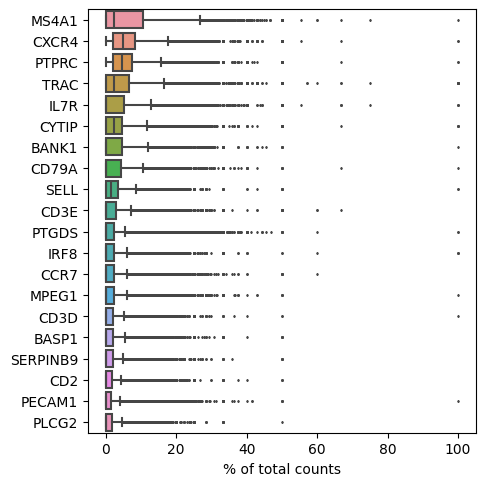

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


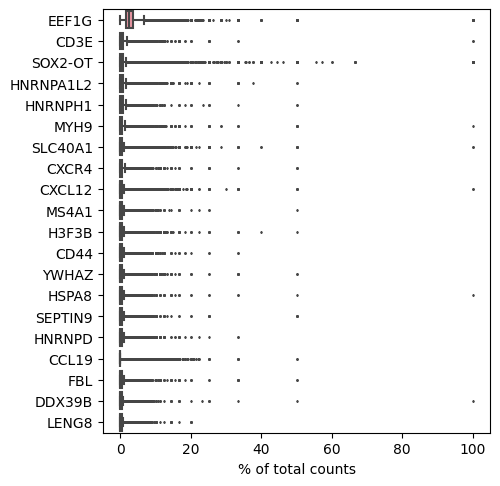

In [7]:
sc.pl.highest_expr_genes(dataset_old, n_top=20)
sc.pl.highest_expr_genes(dataset_5k, n_top=20)

In [8]:
sc.pp.calculate_qc_metrics(
    dataset_old, percent_top=None, log1p=False, inplace=True
)
sc.pp.calculate_qc_metrics(
    dataset_5k, percent_top=None, log1p=False, inplace=True
)

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

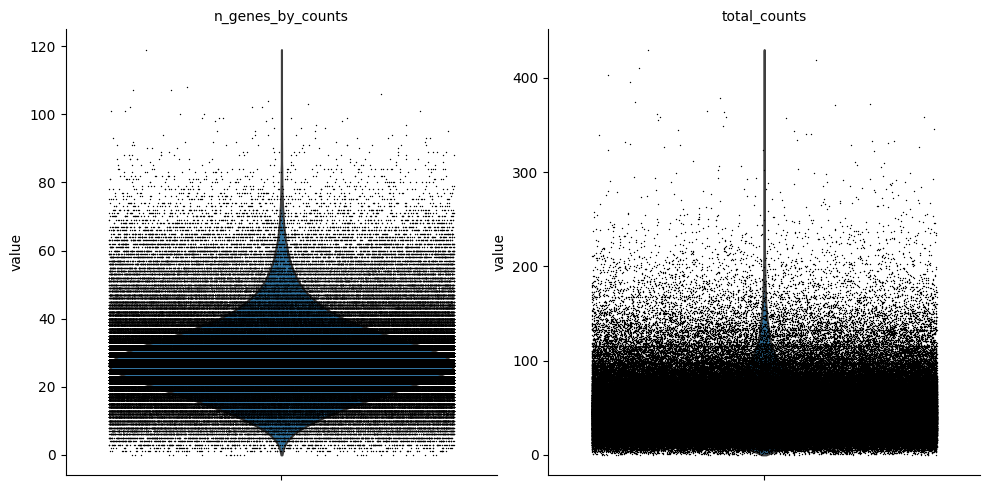

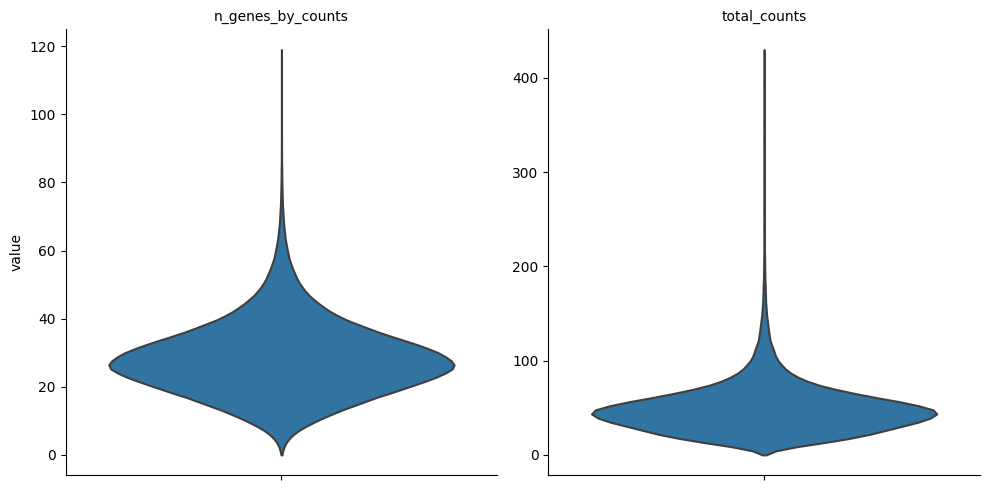

In [10]:
sc.pl.violin(
    dataset_old,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
    #stripplot=False,
)
sc.pl.violin(
    dataset_old,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
    stripplot=False,
)

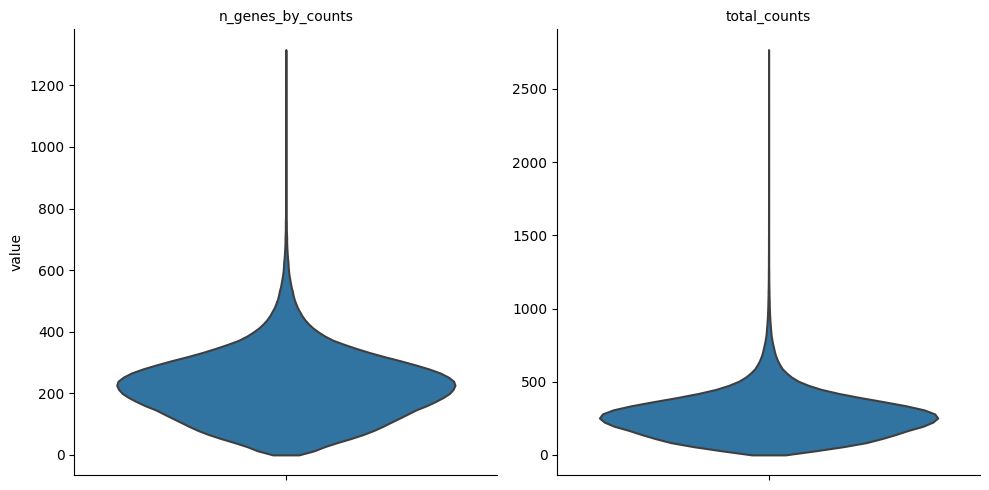

In [11]:
sc.pl.violin(
    dataset_5k,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
    stripplot=False,
)


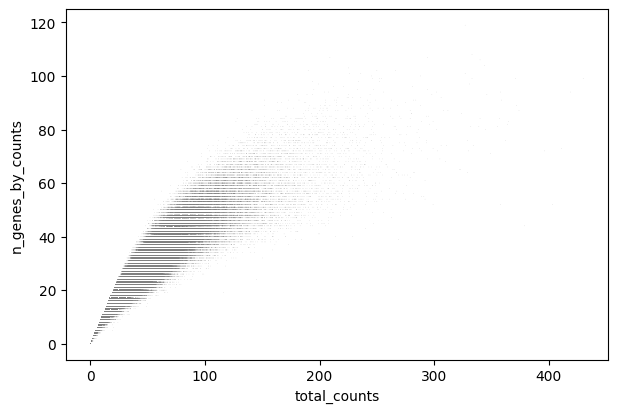

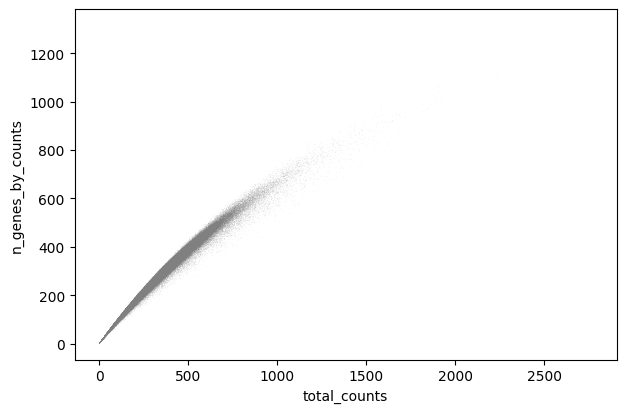

In [12]:
sc.pl.scatter(dataset_old, x="total_counts", y="n_genes_by_counts")
sc.pl.scatter(dataset_5k, x="total_counts", y="n_genes_by_counts")

In [14]:
dataset_old = dataset_old[dataset_old.obs.total_counts > 0, :]
sc.pp.normalize_total(dataset_old, target_sum = 1e4)
sc.pp.log1p(dataset_old)
dataset_5k = dataset_5k[dataset_5k.obs.total_counts > 0, :]
sc.pp.normalize_total(dataset_5k, target_sum = 1e4)
sc.pp.log1p(dataset_5k)


/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


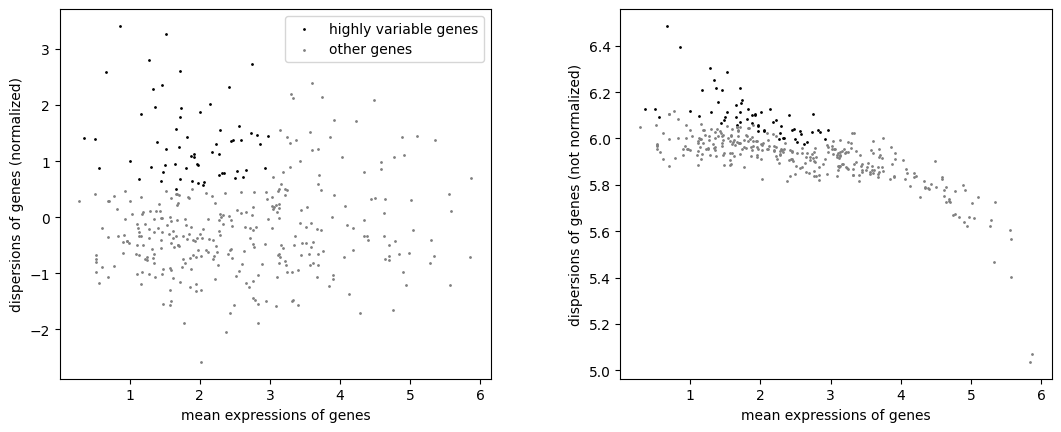

In [19]:
sc.pp.highly_variable_genes(dataset_old, min_mean=0.0125, max_mean=3, min_disp=0.5)#nicht mehr
sc.pl.highly_variable_genes(dataset_old)

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


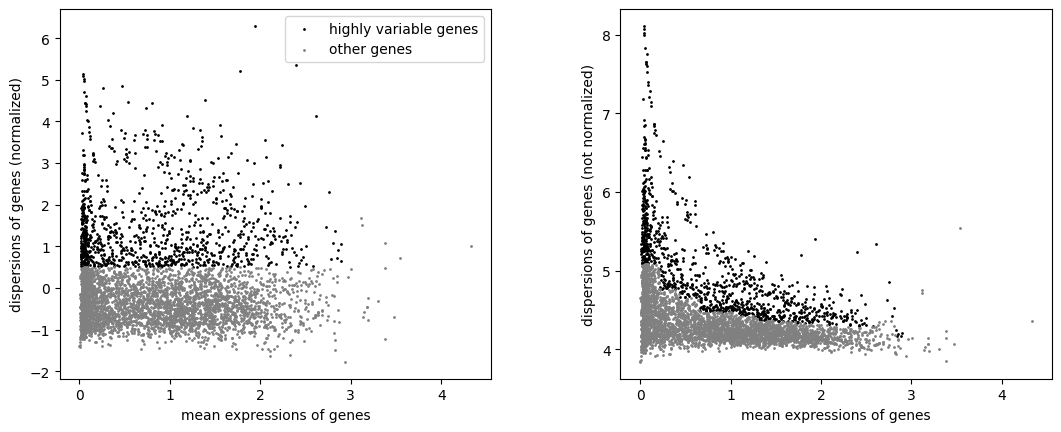

In [20]:
sc.pp.highly_variable_genes(dataset_5k, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(dataset_5k)

In [21]:
dataset_old.raw = dataset_old
dataset_5k.raw = dataset_5k

In [22]:
dataset_old = dataset_old[:, dataset_old.var.highly_variable]
dataset_5k = dataset_5k[:, dataset_5k.var.highly_variable] #nicht mehr

In [35]:
dataset_old.var.highly_variable.sum()

62

In [36]:
dataset_5k.var.highly_variable.sum()

1001

In [23]:
sc.pp.regress_out(dataset_old, "total_counts")
sc.pp.regress_out(dataset_5k, "total_counts")

In [24]:
sc.pp.scale(dataset_old, max_value = 10)
sc.pp.scale(dataset_5k, max_value = 10)

In [26]:
old_results_file = "/Users/isabelgiray/Desktop/TUM/Hiwi/Isabel_Hiwi/old_results.h5ad"
k_results_file = "/Users/isabelgiray/Desktop/TUM/Hiwi/Isabel_Hiwi/k_results.h5ad"

In [27]:
dataset_old.write(old_results_file)
dataset_5k.write(k_results_file)